val acc:0.66 | lr:0.005430061422494919, weight decay:8.334663051499258e-08
val acc:0.34 | lr:0.001968576178709104, weight decay:1.411615172391874e-08
val acc:0.12 | lr:7.897070621628998e-06, weight decay:3.3411154126975874e-05
val acc:0.14 | lr:0.001051365029806748, weight decay:3.7227308175515657e-06
val acc:0.36 | lr:0.0012865265215355204, weight decay:9.5351846469542e-06
val acc:0.09 | lr:9.727712951153574e-06, weight decay:2.22518501191946e-08
val acc:0.7 | lr:0.006433433724855972, weight decay:1.0908877157003849e-06
val acc:0.09 | lr:3.3512878403165527e-06, weight decay:5.55942977725739e-06
val acc:0.14 | lr:0.0004676006366527328, weight decay:4.296273058150127e-06
val acc:0.06 | lr:1.3051784961255266e-06, weight decay:4.29137137107031e-07
val acc:0.12 | lr:0.0003575425349002972, weight decay:6.06256596366382e-06
val acc:0.08 | lr:0.00012466821869047332, weight decay:5.589567821944145e-07
val acc:0.2 | lr:0.0012763248957359554, weight decay:6.32752156047302e-05
val acc:0.18 | lr:0

Best-12(val acc:0.6) | lr:0.004800299997382603, weight decay:2.704572925581013e-08
Best-13(val acc:0.58) | lr:0.0034995555452565974, weight decay:2.5356169063881216e-06
Best-14(val acc:0.57) | lr:0.0044777307214125105, weight decay:3.714545059624873e-07
Best-15(val acc:0.54) | lr:0.005174590346237937, weight decay:5.5469755812481984e-05
Best-16(val acc:0.53) | lr:0.004640606986724808, weight decay:1.7473898691933964e-05
Best-17(val acc:0.53) | lr:0.0038986844749537876, weight decay:2.541415775086393e-06
Best-18(val acc:0.51) | lr:0.004157826480928303, weight decay:1.7658218925419475e-06
Best-19(val acc:0.5) | lr:0.003653025806044495, weight decay:1.6724538386138415e-06
Best-20(val acc:0.47) | lr:0.003204872950525152, weight decay:1.7675365572977096e-07


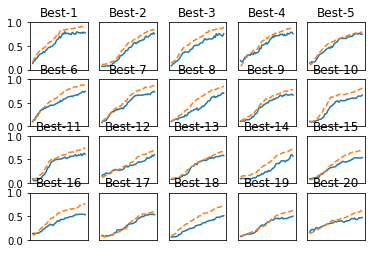

In [1]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()